# Домашнее задание №4

Задание выполнил(а): `Сетдеков Кирилл`

### Общая информация

__Дата выдачи:__ 11.06.2021

__Дедлайн:__ 21.06.2021 23:59

### О задании

Часть 1 содержит теоретические задачи на решающие деревья.

Часть 2 содержит практическое задание на реализацию разбиения вершины в решающем дереве.

Часть 3 содержит практическое задание на применение ансамблей в машинном обучении.

Обратите внимание, что вам не только нужно написать код, но и в некоторых местах ответить на вопросы.



### Оценивание и штрафы


#### Theory  [4 балла]
* [Задание 1](#task1) [1 балл]
* [Задание 2](#task2) [1 балл]
* [Задание 3](#task3) [1 балл]
* [Задание 4](#task4) [1 балл]

#### Решающие деревья [7 баллов]
* [Задание 1](#task2_1) [1 балл]
* [Задание 2](#task2_2) [1 балл]
* [Задание 3](#task2_3) [1 балл]
* [Задание 4](#task2_4) [2 балла]
* [Задание 5](#task2_5) [1 балл]
* [Задание 6](#task2_6) [1 балл]

#### Ансамбли  [7 баллов]
* [Задание 1](#task3_1) [1 балл]
* [Задание 2](#task3_2) [1 балл]
* [Задание 3](#task3_3) [1 балл]
* [Задание 4](#task3_4) [2 балла]
* [Задание 5](#task3_5) [1 балл]
* [Задание 6](#task3_6) [1 балл]


Итоговая оценка за домашнюю работу вычисляется по формуле: $$s \cdot \frac{10}{18},$$ где $s$ - сумма набранных балов. 

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.25 балла в день (от оценки в 10 бальной шкале), но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/course/811). 

# Часть 1. Теоритическая

### Задание 1 [1 балл] <a id="task1"></a>

В листе дерева оказываются 10 объектов, 8 из которых из одного класса, а 2 - из второго. Посчитайте (двоичную - с логарифмом по основанию 2) энтропию получившейся выборки в листе. Ответ округлите до двух знаков после запятой.

Посчитаем энтропию по формуле $H(p_1, p_2) = -p_1 \log_2 p_1 - p_2 \log_2 p_2$

In [15]:
import numpy as np

p_1 = 8/10
p_2 = 1-p_1

p_list = [p_1, p_2]

def entr_calc(p_vector):
    """calculate entropy from a vector of probs

    Args:
        p_vector (list): список вероятностей

    Returns:
        float: значение энтропии
    """  
    ind_entropy_list = [(lambda x: 0 if x==0 else -x * np.log2(x))(x) for x in p_vector]
    entropy = sum(ind_entropy_list)
    return entropy
    
entr_calc(p_list)


0.7219280948873623

**Ответ:** Значение энтропии в этом листе = 0.7219280948873623

### Задание 2 [1 балл] <a id="task2"></a>

Для приведенной ниже таблицы посчитайте, сколько нужно перебрать предикатов вида $[x_j = a]$ ([признак = какое-то значение]), чтобы построить первый узел решающего дерева.

| $x_1$ | $x_2$ | $x_3$ | $y$ |
|------|------|------|------|
| A1 | A2 | A3 | A|
| B1 | A2 | A3 | A|
| C1 | B2 | A3 | B|
| A1 | C2 | B3 | A|
| B1 | D2 | A3 | B|
| B1 | C2 | B3 | B|
| C1 | D2 | B3 | A|

**Ответ:** **9**. У нас есть 3 уникальных значения для $x_1$, 4 для $x_2$, 2 для $x_3$. Так как у нас предикат не вида $[x_j < a]$, мы не можем брать границы между значениям, следовательно потребуется не 6 предикатов (n-1 штук для каждой переменной), а 9 - сумма числа уникальных значений для каждой переменной.

### Задание 3 [1 балл] <a id="task3"></a>

Используя приведенную таблицу, по какому признаку следует формировать первый узел решающего дерева, если мы хотим предсказать $y$? В качестве критерия информативности использовать энтропию, в качестве критериев разделения - индикаторы $[x_j = a]$.

| $x_1$ | $x_2$ | $x_3$ | $x_4$ | $y$ |
|------|------|------|------|------|
| A1 | A2 | A3 | A4 | A |
| B1 | A2 | B3 | A4 | A |
| C1 | C2 | A3 | A4 | A |
| A1 | A2 | D3 | B4 | A |
| C1 | B2 | C3 | A4 | B |
| B1 | C2 | D3 | B4 | A |
| A1 | B2 | B3 | A4 | A |
| C1 | C2 | C3 | B4 | B |
| B1 | B2 | C3 | B4 | B |
| A1 | C2 | C3 | A4 | B |

__Подсказка.__ *Внимательно посмотрите на данные.*

In [16]:
root_p = [0.6, 0.4]
rr_x3_c3 = [0, 1]
rr_x3_nonc3 = [1, 0]

print(entr_calc(root_p))
print(entr_calc(rr_x3_c3))
print(entr_calc(rr_x3_nonc3))

entr_calc(root_p) - entr_calc(rr_x3_c3) - entr_calc(rr_x3_nonc3)



0.9709505944546686
0.0
0.0


0.9709505944546686

**Ответ:** Нужно брать признак $x_3$ и критерий разделения $[x_3 = С3]$ так как такое разделение дает 0 энтропию на листах, идеально разделеняя данные и дает максимальное значения критерия информативности - равное значению энтропии в корне дерева.

### Задание 4 [1 балл] <a id="task4"></a>

Из перечисленных наборов объектов разных классов выберите набор с **наименьшей** энтропией.

    1) 30 объектов класса 0, 10 объектов класса 1
    2) 20 объектов класса 0, 10 объектов класса 1, 10 объектов класса 2
    3) 35 объектов класса 0, 5 объектов класса 1, 5 объектов класса 2
    4) 20 объектов класса 0, 20 объектов класса 1

In [24]:
print(f'энтропия для 1) набора {entr_calc([30/40, 10/40]):.3f}')
print(f'энтропия для 2) набора {entr_calc([20/40, 10/40, 10/40]):.3f}')
print(f'энтропия для 3) набора {entr_calc([35/45, 5/45, 5/45]):.3f}')
print(f'энтропия для 4) набора {entr_calc([20/40, 20/40]):.3f}')



энтропия для 1) набора 0.811
энтропия для 2) набора 1.500
энтропия для 3) набора 0.986
энтропия для 4) набора 1.000


**Ответ:** набор с наименьшей энтропией - набор 1. Часть можно логически откинуть: в наборе 2 энтрпия будет больше из-за большего размазывания объектов по 3 классам, в наборе 4 энтропия будет максимальна для двух классов, так как разделение поровну. Отделить 1 от 3 набора, можно посчитав фактическое значени, что я сделал функцией, написанной для 1 задания.

# Часть 2. Практика - решающие деревья.

В этой части вам предстоит реализовать первое разбиение в решающем дереве своими руками.

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

%matplotlib inline

In [26]:
plt.rcParams['figure.figsize'] = (11, 6.5)

Импортируем данные.

In [27]:
boston = load_boston()

Описание данных:

In [28]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Данные представлены в виде словаря, у которого есть следующие ключи:

In [29]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Представим данные в виде `pandas.DataFrame`, также добавим в них целевую переменную.

In [30]:
X = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
X['target'] = boston['target']
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Распределение целевой переменной:

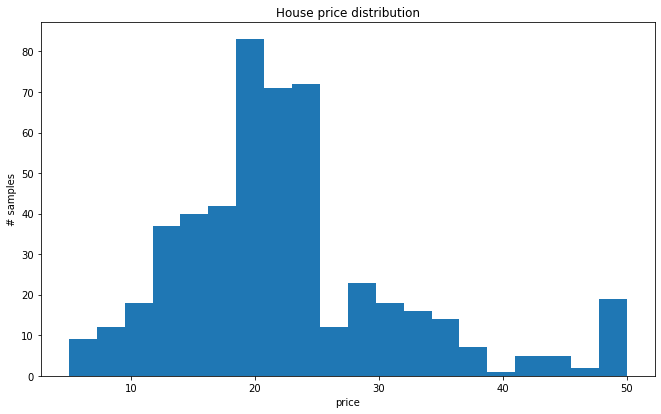

In [31]:
plt.title('House price distribution')
plt.xlabel('price')
plt.ylabel('# samples')
plt.hist(X['target'], bins=20)
plt.show()

Напомним, как ищется разбиение в конкретной вершине. Пусть мы выбрали какой-то признак и порог. Обозначим $R_m$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения.

Критерий ошибки выглядит следующим образом:

$$
Q(R_m, j, t) = \frac{|R_\ell|}{|R_m|}H(R_\ell) + \frac{|R_r|}{|R_m|}H(R_r) \to \min_{j, t},
$$

где $R_\ell$ - множество объектов в левой вершине (поддереве), $R_r$ - множество объектов в правой вершине (поддереве), $|R|$ - число объектов в множестве $R$, а $H(R)$ - критерий информативности, с помощью которого можно оценить качество распределения целевой переменной среди объектов множества $R$. Например, в случае классификации $H(R)$ может быть выражено энтропией, а в случае регрессии - дисперсией.

Мы хотим минимизировать $Q(R_m, j, t)$ по $j$ и $t$ - то есть подобрать такие $j$ и $t$, что для них значение $Q(R_m, j, t)$ будет минимальным.

### Задание 1 [1 балл] <a id="task2_1"></a>

Реализуйте функцию подсчета критерия информативности. В данном случае мы решаем задачу регрессии, так что используйте дисперсию значений целевой переменной (колонка 'target').

Сделайте так, чтобы даже для пустой таблицы (в которой нет ни одного объекта) выдавался численный ответ - 0, а не NaN. Возможно, в этом вам поможет функция `np.nan_to_num`.

In [48]:
def H(R):
    """
    INPUT
    R - pd.DataFrame - характеризует собой набор объектов в вершине. В нашем случае R - это будет подмножество объектов из
    изначальной таблицы X
    
    OUTPUT
    H(R) - значение критерия информативности (дисперсия значений целевой переменной объектов в вершине)
    """
    var = np.var(R.target, ddof=1)
    return np.nan_to_num(var)

In [51]:
# Test the function
assert np.allclose(H(X), 84.5867235940986)
assert np.allclose(H(pd.DataFrame(columns=X.columns)), 0.0)

### Задание 2 [1 балл]<a id="task2_2"></a>

Реализуйте функцию, которая разобьет объекты в данной вершине на две группы по заданному признаку `feature` и порогу `t`. Пусть в левую вершину попадут объекты, у которых значение `feature <= t`, а в правую - у которых значение `feature > t`.

In [9]:
def split_node(R_m, feature, t):
    """
    INPUT
    R_m - pd.DataFrame - объекты в исходной вершине
    feature - string - название столбца (признака)
    t - float - порог признака feature, по которому разбиваем данные
    
    OUTPUT
    R_l - pd.DataFrame - объекты, которые попали в левую вершину
    R_r - pd.DataFrame - объекты, которые попали в правую вершину
    """
    R_l = # YOUR CODE HERE
    R_r = # YOUR CODE HERE
    return R_l, R_r

In [ ]:
# Test the function
R_l, R_r = split_node(X, 'ZN', 6.0)
assert np.allclose(H(R_l), 73.7555971219894)
assert np.allclose(H(R_r), 70.64116541353386)
assert R_l['ZN'].max() <= 6.0
assert R_r['ZN'].min() > 6.0

### Задание 3 [1 балл]<a id="task2_3"></a>

Реализуйте функцию, подсчитывающую значение критерия ошибки. Разделите данные по заданным признаку и порогу, посчитайте значения критериев информативности в полученных вершинах и получите результат по формуле в начале задания.

In [10]:
def q_error(R_m, feature, t):
    """
    INPUT
    R_m - pd.DataFrame - объекты в исходной вершине
    feature - string - название столбца (признака)
    t - float - порог признака feature, по которому разбиваем данные
    
    OUTPUT
    Q - float - значение критерия ошибки
    """
    Q = # YOUR CODE HERE
    return Q

In [ ]:
assert np.allclose(q_error(X, 'ZN', 6.0), 72.93082666955256)

### Задание 4 [2 балла]<a id="task2_4"></a>

Теперь, когда основные функции реализованы, можно перейти к непосредственному поиску оптимальных признака и порога. Для начала реализуйте функцию, с помощью которой можно найти оптимальный порог для разбиения вершины с помощью заданного признака. В качестве пороговых значений можно перебрать все уникальные значения признака, посчитать для каждого значение критерия ошибки, а затем выбрать пороговое значение, соответствующее наименьшему значению критерия ошибки.

In [11]:
def get_optimal_t(R_m, feature):
    """
    INPUT
    R_m - pd.DataFrame - объекты в исходной вершине
    feature - string - название столбца (признака)
    
    OUTPUT
    t_opt - float - оптимальное значение порога (для которого значение критерия ошибки минимально)
    t_array - list - список перебираемых пороговых значений
    Q_array - list - список значений критерия ошибки, соответствующих перебранным пороговым значениям (для построения графика)
    """
    Q_array = # YOUR CODE HERE
    t_array = # YOUR CODE HERE
    t_opt = # YOUR CODE HERE
    return t_opt, t_array, Q_array

In [ ]:
# Test function
t_opt, t_array, Q_array = get_optimal_t(X, 'CRIM')
assert np.allclose(t_opt, 6.65492)

Выведите график зависимости значения критерия ошибки (`Q`) от порогового значения (`t`) при разбиении вершины по признаку `CRIM`.

In [2]:
# your code here

### Задание 5 [1 балл]<a id="task2_5"></a>

Теперь реализуйте функцию, с помощью которой можно определить также оптимальный признак. Внутри функции пройдитесь циклом по всем признакам, для каждого вызовите `get_optimal_t`, найдите оптимальный порог и минимальное значение критерия ошибки. Сравните полученные результаты (признаки, пороги и значения критерия ошибки для них) и выберите признак с порогом, соответствующие наименьшему значению критерия ошибки.

**ИСКЛЮЧИТЕ ИЗ РАССМОТРЕНИЯ КОЛОНКУ 'target', ЭТО НЕ ПРИЗНАК!**

In [1]:
def get_optimal_split(R_m):
    """
    INPUT
    R_m - pd.DataFrame - объекты в исходной вершине
    
    OUTPUT
    feature_opt - оптимальное значение признака для разбиения вершины
    t_opt - оптимальное значение порога для разбиения вершины
    """
    feature_opt = # YOUR CODE HERE
    t_opt = # YOUR CODE HERE
    return feature_opt, t_opt

In [ ]:
# Test the function
feature_opt, t_opt = get_optimal_split(X)
print('Optimal feature:', feature_opt)
print('Optimal t:', t_opt)
assert feature_opt == 'RM'
assert np.allclose(t_opt, 6.939)

### Задание 6 [1 балл]<a id="task2_6"></a>

Изобразите на графике диаграмму рассеяния для объектов выборки со значением оптимального признака на одной оси и целевой переменной на другой. Нарисуйте линию, показывающую оптимальное разбиение по порогу (функция `plt.axvline`).

Как вы можете интерпретировать то, что полученное разбиение - лучшее?

In [3]:
# your code here

# Часть 3. Практика - ансамбли

В данной части будем работать [с задачей предсказания диабета у пациента](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data).

In [60]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [38]:
data = pd.read_csv('diabetes.csv')

In [39]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
data.shape

(768, 9)

Распределение целевой переменной:

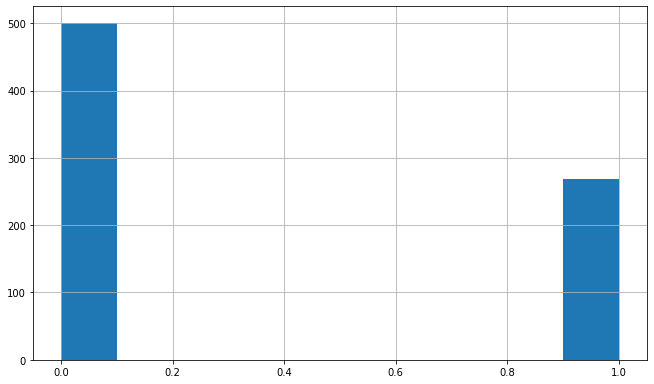

In [41]:
data['Outcome'].hist()
plt.show()

### Задание 1 [1 балл]<a id="task3_1"></a>

Разбейте выборку на обучающую и тестовую части в отношении 70:30. Не забудьте отделить целевую переменную от признаков (чтобы случайно не включить ее в обучение как признак).

In [42]:
# your code here

### Задание 2 [1 балл]<a id="task3_2"></a>

Обучите [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) на деревьях (параметр `base_estimator=DecisionTreeClassifier()`). Оцените качество классификации на тестовой выборке по метрикам accuracy, precision и recall.

In [ ]:
# your code here

### Задание 3 [1 балл]<a id="task3_3"></a>

Теперь обучите Random Forest с числом деревьев, равным 50. Оцените качество классификации по тем же метрикам. Какая из двух построенных моделей показала себя лучше?

In [ ]:
# your code here

### Задание 4 [2 балл]<a id="task3_4"></a>

Для случайного леса проанализируйте значение AUC-ROC на этих же данных в зависимости от изменения параметров (можете сделать обычный перебор с обучением/тестированием в цикле):
* `'n_estimators'` (можно перебрать около 10 значений из отрезка от 10 до 1500)
* `'min_samples_leaf'` (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости AUC-ROC от этих параметров. Какие выводы вы можете сделать?

In [ ]:
# your code here

### Задание 5 [1 балл]<a id="task3_5"></a>

Для лучшей модели случайного леса посчитайте важность признаков и постройте bar plot с помощью функции [`plt.bar`](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.bar.html). Какой признак оказался самым важным для определения диабета?

In [ ]:
# your code here

### Задание 6 [1 балл]<a id="task3_6"></a>

По аналогии со случайным лесом, переберите различные значения числа деревьев для [`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) и постройте график зависимости AUC-ROC от числа деревьев. Что вы наблюдаете? Отличается ли этот график от аналогичного графика для случайного леса?

In [ ]:
# your code here